In [1]:
import numpy as np
import pandas as pd 
from pathlib import Path
import matplotlib.pyplot as plt 

%matplotlib inline 

#### 1. Load the data of parameterization of each reservoir simulation run.

Column introduction:

    case_num: case number of each simulation run, shared and matched between df_param and df_ts;
    
    category: 'train' or 'test' tag pointing to training and testing case_num for machine/deep learning models, 20% data for                    testing, and 80% data for training purpose.

    Kh_Kv: permeability anisotropic ratio, range: 1 to 100;

    inj_rate: constant water injection rate at injection well, range: 1000 to 3000 STB/Day;

    permeability: reservoir permeability in horizontal plane or (x, y directions), range: 50 to 500 md;

    porosity: reservoir porosity, range: 0.1 to 0.3;

    prod_bhp: constant bottom-hole pressure at production well, range: 200 to 1000 psia;

    thickness: reservoir thickness, range: 10 to 100 ft;

In [2]:
# Load static data 
df_param = pd.read_csv('parameters.csv')

In [3]:
# data dimension
df_param.shape

(1000, 8)

In [15]:
df_param.head(20) 

,case_num,category,Kh_Kv,inj_rate,permeability,porosity,prod_bhp,thickness
0,0,train,16.423475,1740.711355,288.983333,0.163009,796.992254,23.718632
1,1,train,96.690954,2216.996775,127.801703,0.265198,672.408364,50.103320
2,2,train,45.990485,1494.508214,321.702554,0.109952,532.563399,73.410282
3,3,train,88.322302,2242.513803,427.275505,0.137530,976.777682,37.443929
4,4,train,27.823837,2994.073285,398.741243,0.220836,465.207942,15.788940
5,5,train,49.376005,1289.673511,242.772655,0.136013,874.179324,51.021977
6,6,train,68.025133,1701.870338,116.347334,0.226201,664.151494,25.855127
7,7,train,21.987688,2914.393603,69.714149,0.244081,660.193827,20.884281
8,8,train,49.742721,1634.952561,325.446493,0.147798,395.909714,20.584933
9,9,test,42.494315,1671.382942,259.124329,0.229653,302.130499,17.101153


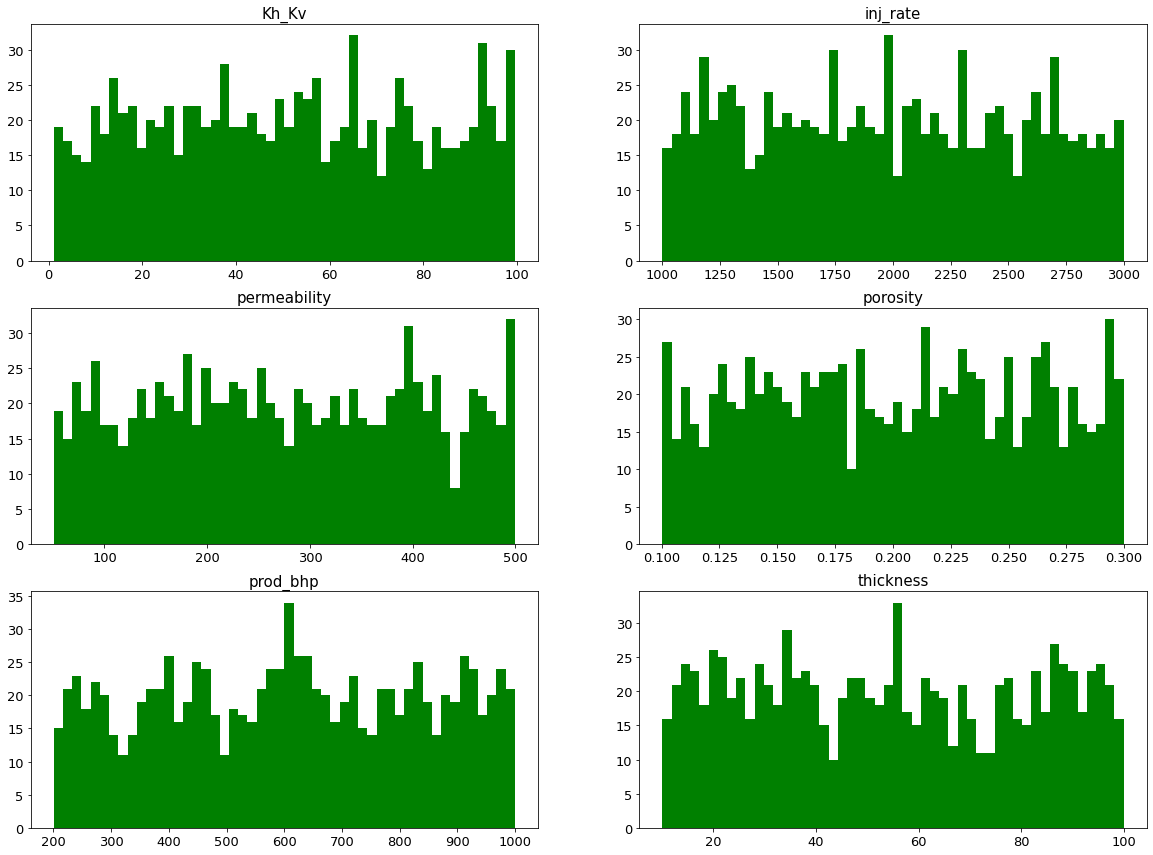

In [5]:
attributes = ['Kh_Kv', 'inj_rate', 'permeability', 'porosity', 'prod_bhp', 'thickness']

fs = 15
plt.figure(figsize=(20, 20))
for i, col in enumerate(attributes, 1):
    plt.subplot(4, 2, i)
    plt.hist(df_param[col], bins=50, density=False, color='green')
    plt.title(col, fontsize=fs)
    plt.xticks(fontsize=fs-2)
    plt.yticks(fontsize=fs-2)

#### 2. Load the data of time series data of each reservoir simulation run.

Column introduction:

    case_num: case number of each simulation run, shared and matched between df_param and df_ts;
    
    days: day of each time step of simulation output data, unit: day;

    years: days / 365.0, unit: year;

    oil_prod_rate: oil production rate at each time step, unit: STB/day;

    oil_prod_cum: cumulative oil production volume at each time step, it is an integration of oil_prod_rate with regards to                       days, unit: STB;

    water_inj_rate: water injection rate at each time step, unit: STB;

    water_inj_cum: cumulative water injection volume at each time step, it is an integration of water_inj_rate with regards to   days, unit: STB;

In [6]:
# Load static data 
df_ts = pd.read_csv('production.csv')

In [7]:
df_ts.columns

Index(['case_num', 'days', 'years', 'oil_prod_rate', 'oil_prod_cum',
       'water_inj_rate', 'water_inj_cum'],
      dtype='object')

In [8]:
df_ts.head(10)

,case_num,days,years,oil_prod_rate,oil_prod_cum,water_inj_rate,water_inj_cum
0,0,0,0.000000,0.00,0,0.00,0.0
1,0,31,0.084932,26614.00,825035,1740.71,53962.1
2,0,62,0.169863,21427.70,1489290,1740.71,107924.0
3,0,93,0.254795,18809.70,2072390,1740.71,161886.0
4,0,124,0.339726,16676.60,2589370,1740.71,215848.0
5,0,155,0.424658,14810.90,3048500,1740.71,269810.0
6,0,186,0.509589,13181.00,3457110,1740.71,323772.0
7,0,217,0.594521,11756.60,3821570,1740.71,377734.0
8,0,248,0.679452,10510.50,4147390,1740.71,431696.0
9,0,279,0.764384,9416.27,4439300,1740.71,485658.0


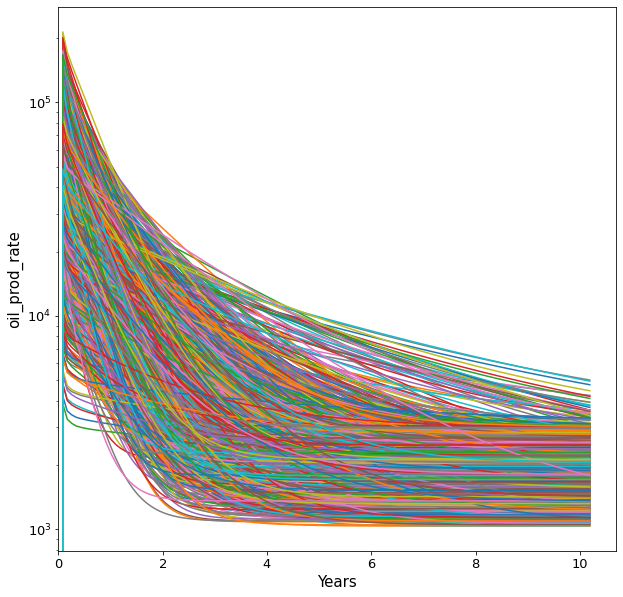

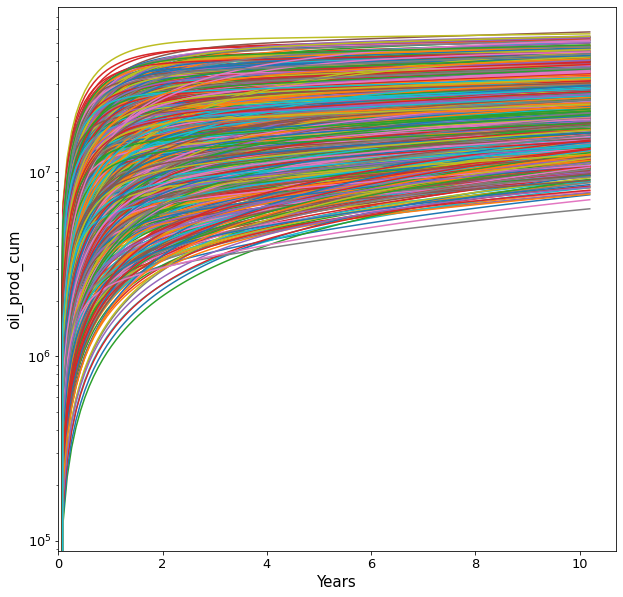

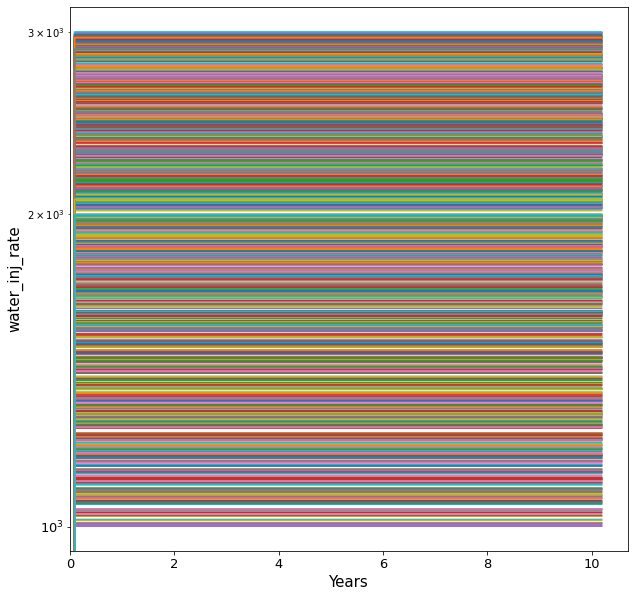

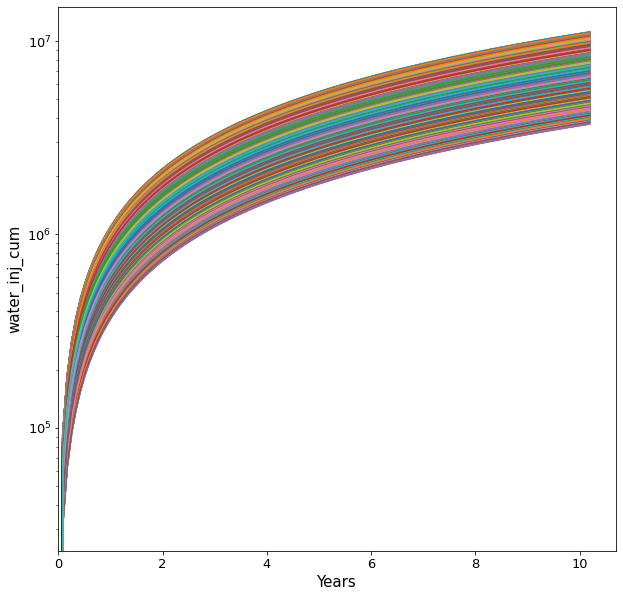

In [9]:
# Plot oil production rate
def plot_ts(df_ts, col='oil_prod_rate'):
    
    fs = 15
    
    plt.figure(figsize=(10, 10))

    for i, case in enumerate(df_ts['case_num'].unique(), 1):

        df = df_ts[(df_ts['case_num'] == case)]

        plt.semilogy(df['years'], df[col])
            
    plt.xlabel('Years', fontsize=fs)
    plt.ylabel(f'{col}', fontsize=fs)
    plt.xticks(fontsize=fs-2)
    plt.yticks(fontsize=fs-2)
    plt.xlim(xmin=0)

    plt.show()
    
# Plot the time series data 
plot_ts(df_ts, col='oil_prod_rate')
plot_ts(df_ts, col='oil_prod_cum')
plot_ts(df_ts, col='water_inj_rate')
plot_ts(df_ts, col='water_inj_cum')

### 3. Project start.

Before we start, it is good to know that the test and training cases (simulation runs) are splitted based on the 'category' column in df_param dataframe, and the dataframes df_ts and df_param sharing the same column, which is 'case_num'.

Test cases will never be involved in the training and/or validation processes.

#### Objective 1 (30 Points):

Develop a machine/deep learning model (sklearn or PyTroch) to predict cumulative oil production volume at 10 years.

Basic deliverables (can be more than this):

(1) The RMSE value (without normalization) of testing data (can be obtained by get_rmse function below);

(2) The R2 score of testing data (can be otained by sklearn.metrics.r2_score);

(3) The parity (scattered) plot with true results and predicted values for testing data;

(4) If you do feature selection, good to also present the feature importance of each feature your select, or your rationale why you add or drop a feature to train the machine learning model. 

Hints:
Input can be columns ['Kh_Kv', 'inj_rate', 'permeability', 'porosity', 'prod_bhp', 'thickness'] in df_param or less;
Output need to be firstly calcualte the cumulative oil production volume at 10 years based on the information in df_ts.

#### Objective 2 (40 Points):
Develop machine/deep learning model(s) (sklearn or PyTroch) which is able to predict oil production rate at year 1, 2, 3, 4, 5, 6, 7, 8, 9, 10 simultaneously (not the scenario of time window sliding that we know oil production rate at year 1, and then predict the same variable at year 2 or later years).

Basic deliverables (can be more than this):

(1) The RMSE value (without normalization) of testing data;

(2) The R2 score of testing data;

(3) The parity (scattered) plot with true results and predicted values for testing data, all data points without normalization;

(4) Plot the time series of each testing case: year vs oil production rate at each year for both true results and predicted values, all data points without normalization;

(5) If you do feature selection, good to also present the feature importance of each feature your select, or your rationale why you add or drop a feature to train the machine learning model.

Hints: 

Input can be columns ['Kh_Kv', 'inj_rate', 'permeability', 'porosity', 'prod_bhp', 'thickness'] in df_param and column 'years' in df_ts, but you also choose less features for sure. 

Output need to be firstly calcualte the oil production rate at each year (year = 1, 2, ..., 10) based on the information in df_ts.

Flexibility: 

You are allowed to train either a single machine/deep learning model or multiple machine/deep learning models to predict the 10 oil production rate.

#### Objective 3: Summary and Presentation (30 Points).

In [13]:
# Utility function
def get_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_pred-y_true)**2.0)) 

def get_rel_l2_error(y_true, y_pred):
    return np.linalg.norm(y_true-y_pred, 2) / np.linalg.norm(y_true, 2)